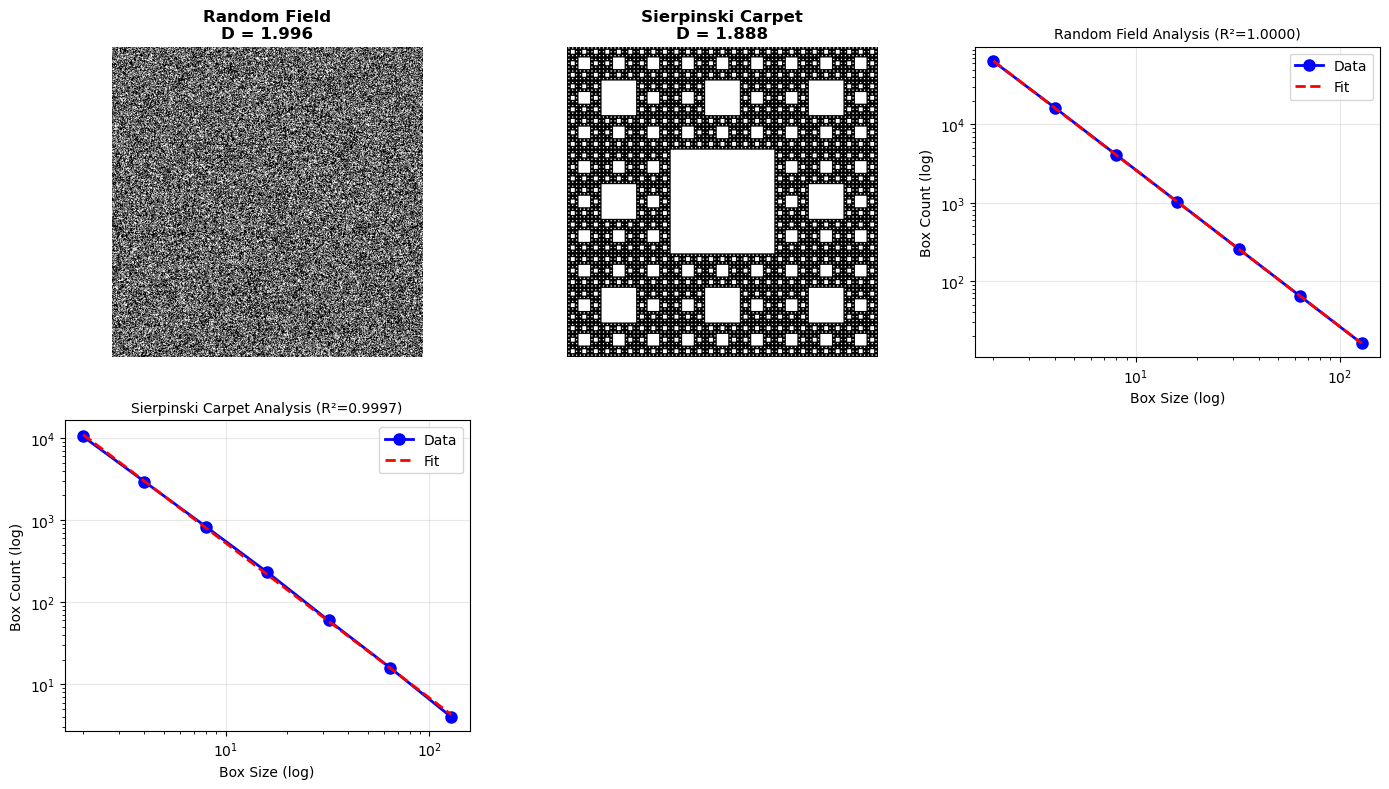

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


def box_count(image, box_size):
    height, width = image.shape
    box_count = 0
    for i in range(0, height, box_size):
        for j in range(0, width, box_size):
            box = image[i:i+box_size, j:j+box_size]
            if np.sum(box) > 0:
                box_count += 1
    return box_count


def generate_random_field(image_size, density):
    image = np.zeros((image_size, image_size))
    for i in range(image_size):
        for j in range(image_size):
            if np.random.random() < density:
                image[i, j] = 1
    return image


def generate_sierpinski(size, iterations=5):
    carpet = np.ones((size, size))
    
    for i in range(iterations):
        step = size // (3 ** i)
        for y in range(0, size, step):
            for x in range(0, size, step):
                if carpet[y, x] == 1:
                    third = step // 3
                    carpet[y + third:y + 2*third, x + third:x + 2*third] = 0
    
    return carpet


image_size = 512
density = 0.6
box_sizes = [2, 4, 8, 16, 32, 64, 128]

random_field = generate_random_field(image_size, density)
sierpinski = generate_sierpinski(243, 5)

fractals = {
    'Random Field': random_field,
    'Sierpinski Carpet': sierpinski
}

results = {}

for name, fractal_image in fractals.items():
    box_counts = []
    valid_sizes = []
    for box_size in box_sizes:
        if box_size < min(fractal_image.shape):
            count = box_count(fractal_image, box_size)
            box_counts.append(count)
            valid_sizes.append(box_size)
    
    log_box_sizes = np.log(valid_sizes)
    log_box_counts = np.log(box_counts)
    slope, intercept, r_value, _, _ = linregress(log_box_sizes, log_box_counts)
    fractal_dimension = -slope
    r_squared = r_value ** 2
    
    results[name] = {
        'dimension': fractal_dimension,
        'r_squared': r_squared,
        'sizes': valid_sizes,
        'counts': box_counts,
        'image': fractal_image
    }

fig = plt.figure(figsize=(14, 8))

for idx, (name, data) in enumerate(results.items()):
    ax = plt.subplot(2, 3, idx + 1)
    ax.imshow(data['image'], cmap='binary', origin='lower')
    ax.set_title(f'{name}\nD = {data["dimension"]:.3f}', fontsize=12, fontweight='bold')
    ax.axis('off')

for idx, (name, data) in enumerate(results.items()):
    ax = plt.subplot(2, 3, idx + 3)
    ax.loglog(data['sizes'], data['counts'], 'bo-', linewidth=2, markersize=8, label='Data')
    
    log_sizes = np.log(data['sizes'])
    log_counts = np.log(data['counts'])
    slope, intercept, _, _, _ = linregress(log_sizes, log_counts)
    fitted = np.exp(intercept + slope * log_sizes)
    ax.loglog(data['sizes'], fitted, 'r--', linewidth=2, label='Fit')
    
    ax.set_xlabel('Box Size (log)', fontsize=10)
    ax.set_ylabel('Box Count (log)', fontsize=10)
    ax.set_title(f'{name} Analysis (R²={data["r_squared"]:.4f})', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
#plt.savefig('fractal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()